<a target="_blank" href="https://colab.research.google.com/github/akramdhaifullah/big-data-analysis/blob/master/net/pcap_ml_uts.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Importing neccesary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Data loading and preprocessing

In [2]:
df = pd.read_csv('tcp_v2.csv',
                 encoding='ISO-8859-1'
                )

In [3]:
df.head()

,time,src_mac,src_ip,src_port,dest_ip,dest_port,encapsulation_type,packet_type,protocol,packet_length,...,fragment_offset,tcp_flags,seq_num,window_size,ack_num,tcp_options,is_duplicate,severity,tcp_rule,info
0,2023-01-30 01:00:07,00:0c:29:52:50:2e,10.10.1.198,59620,172.217.194.95,443,Linux cooked-mode capture v1,Sent by us,TLSv1.2,64468,...,0,0x018,1,501,1,0101080a705310265824ea67,NaN,Warning,TCP,Ignored Unknown Record
1,2023-01-30 01:00:07,00:0c:29:52:50:2e,10.10.1.198,59620,172.217.194.95,443,Linux cooked-mode capture v1,Sent by us,TLSv1.2,64468,...,0,0x018,64401,501,1,0101080a705310275824ea67,NaN,Warning,TCP,Ignored Unknown Record
2,2023-01-30 01:00:07,00:0c:29:52:50:2e,10.10.1.198,59620,172.217.194.95,443,Linux cooked-mode capture v1,Sent by us,TLSv1.2,64468,...,0,0x018,128801,501,1,0101080a705310275824ea67,NaN,Warning,TCP,Ignored Unknown Record
3,2023-01-30 01:00:07,00:0c:29:52:50:2e,10.10.1.198,59620,172.217.194.95,443,Linux cooked-mode capture v1,Sent by us,TLSv1.2,64468,...,0,0x018,193201,501,1,0101080a705310275824ea67,NaN,Warning,TCP,Ignored Unknown Record
4,2023-01-30 01:00:07,00:0c:29:52:50:2e,10.10.1.198,59620,172.217.194.95,443,Linux cooked-mode capture v1,Sent by us,TLSv1.2,64468,...,0,0x018,257601,501,1,0101080a705310285824ea67,NaN,Warning,TCP,Ignored Unknown Record


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253391 entries, 0 to 253390
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   time                253391 non-null  object
 1   src_mac             253391 non-null  object
 2   src_ip              253391 non-null  object
 3   src_port            253391 non-null  int64 
 4   dest_ip             253391 non-null  object
 5   dest_port           253391 non-null  int64 
 6   encapsulation_type  253391 non-null  object
 7   packet_type         253391 non-null  object
 8   protocol            253391 non-null  object
 9   packet_length       253391 non-null  int64 
 10  dsp                 253391 non-null  object
 11  ip_flags            253391 non-null  object
 12  fragment_offset     253391 non-null  int64 
 13  tcp_flags           253391 non-null  object
 14  seq_num             253391 non-null  int64 
 15  window_size         253391 non-null  int64 
 16  ac

In [5]:
# viewing unique values in each features
for feature in df:
    print(feature)
    print(df[feature].unique())

time
['2023-01-30 01:00:07' '2023-01-30 01:00:08' '2023-01-30 01:00:09'
 '2023-01-30 01:00:10' '2023-01-30 01:00:11' '2023-01-30 01:00:12'
 '2023-01-30 01:00:13' '2023-01-30 01:00:14' '2023-01-30 01:00:16'
 '2023-01-30 01:00:17' '2023-01-30 01:00:18' '2023-01-30 01:00:19'
 '2023-01-30 01:00:20' '2023-01-30 01:00:21' '2023-01-30 01:00:22'
 '2023-01-30 01:00:23' '2023-01-30 01:00:24' '2023-01-30 01:00:25'
 '2023-01-30 01:00:26' '2023-01-30 01:00:27' '2023-01-30 01:00:28'
 '2023-01-30 01:00:29' '2023-01-30 01:00:31' '2023-01-30 01:00:32'
 '2023-01-30 01:00:33' '2023-01-30 01:00:34' '2023-01-30 01:00:35'
 '2023-01-30 01:00:36' '2023-01-30 01:00:37' '2023-01-30 01:00:38'
 '2023-01-30 01:00:39' '2023-01-30 01:00:40' '2023-01-30 01:00:41'
 '2023-01-30 01:00:42' '2023-01-30 01:00:43' '2023-01-30 01:00:44'
 '2023-01-30 01:00:45' '2023-01-30 01:00:46' '2023-01-30 01:00:47']
src_mac
['00:0c:29:52:50:2e' '5c:58:e6:92:50:43' '00:0c:29:4e:eb:b2'
 '00:00:00:00:00:00']
src_ip
['10.10.1.198' '172.217.1

In [6]:
# dropping unnecessary feature
df_final = df.drop(columns=['time', 'info', 'encapsulation_type', 'fragment_offset'])

In [7]:
# Replacing 'nan' with 0 and the other value with 1
df_final['is_duplicate'] = df_final['is_duplicate'].fillna(0)
df_final['is_duplicate'] = df_final['is_duplicate'].apply(lambda x: 1 if x == 'â\\234\\223' else x)

In [8]:
# Filling null values in Severity as 'Unspecified'
df_final.severity = df_final.severity.fillna('Unspecified')

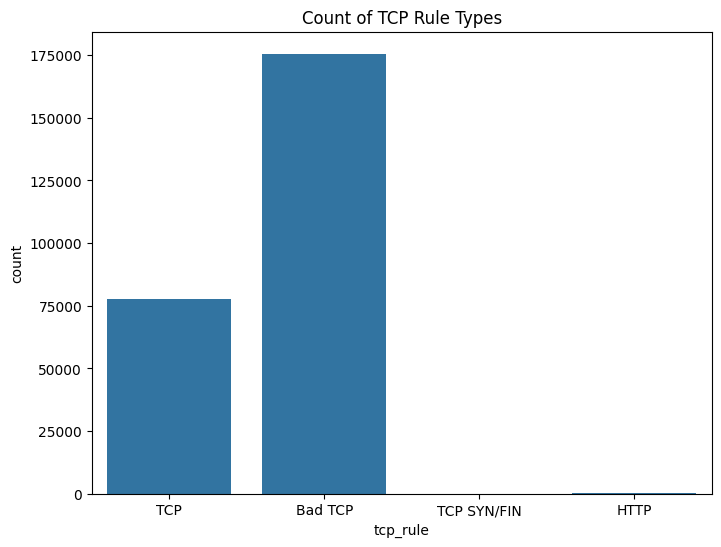

In [9]:
# Visualization 1: Countplot for 'tcp_rule'
plt.figure(figsize=(8, 6))
sns.countplot(x='tcp_rule', data=df_final)
plt.title('Count of TCP Rule Types')
plt.show()

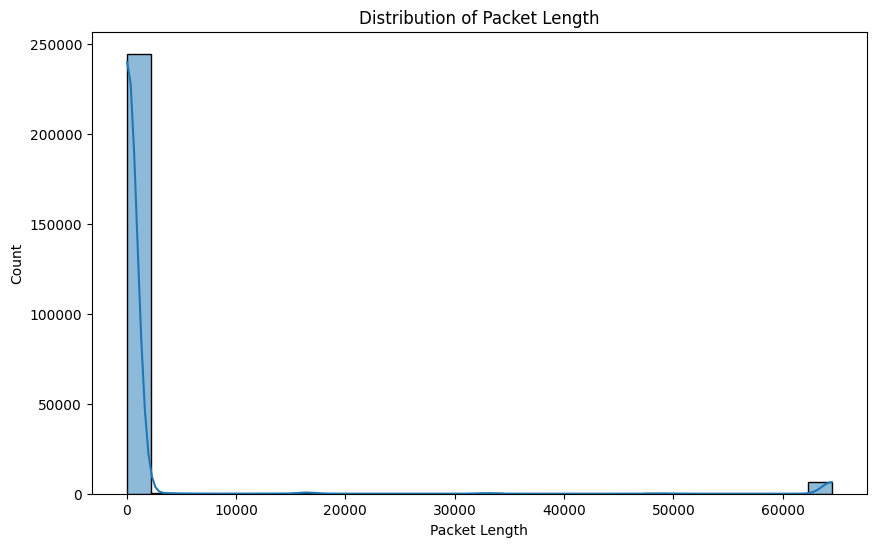

In [10]:
# Visualization 2: Distribution of 'packet_length'
plt.figure(figsize=(10, 6))
sns.histplot(df_final['packet_length'], bins=30, kde=True)
plt.title('Distribution of Packet Length')
plt.xlabel('Packet Length')
plt.show()

In [11]:
# function to label if a frame is suspicious or not
def label_suspicious(row):
    if (row['packet_length'] > 65000) and (row['tcp_flags'] == "0x018") and (row['seq_num'] > 5000):
        return 'suspicious'
    # elif (row['src_ip'] not in trusted_ip_list) or (row['dest_ip'] not in trusted_ip_list):
    #     return 'Suspicious'
    # elif (row['packet_length'] > 20000 and row['time'] < "2023-01-30 04:00:00"):
    #     return 'Suspicious'
    # elif row['dest_port'] in suspicious_ports:
    #     return 'Suspicious'
    # elif row['encapsulation_type'] not in trusted_encapsulation_types:
    #     return 'Suspicious'
    # elif row['severity'] `== "High":
    #     return 'Suspicious'
    elif row['is_duplicate'] == 1 and row['tcp_rule'] == "Bad TCP":
        return 'suspicious'
    else:
        return 'normal'

# # Apply the function to the DataFrame to create the 'label' column
# df['label'] = df.apply(label_suspicious, axis=1)

# # Create a new column 'is_suspicious'
df_final['is_suspicious'] = df_final['tcp_rule'].apply(lambda x: 1 if x == 'Bad TCP' else 0)

### Checking for data imbalance in target values

is_suspicious
1    175602
0     77789
Name: count, dtype: int64
Proportion: 2.26


<Axes: title={'center': 'Count (target)'}, xlabel='is_suspicious'>

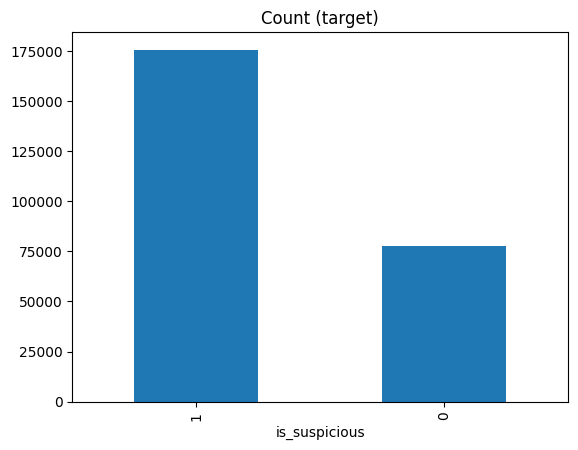

In [12]:
target_count = df_final['is_suspicious'].value_counts()
print(target_count)

# Calculate proportions for a binary target class
proportion = target_count[1] / target_count[0]  # Calculate the proportion for the second class over the first
print('Proportion:', round(proportion, 2))

target_count.plot(kind='bar', title='Count (target)')

<Axes: title={'center': 'Proportion of Classes'}, ylabel='count'>

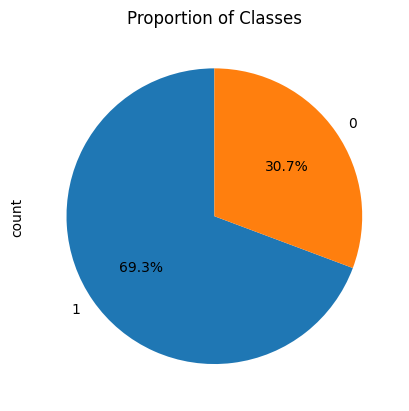

In [13]:
target_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Proportion of Classes')

# Data splitting, encoding, and normalization

In [14]:
encoder = LabelEncoder()

df_encoded = df_final

for feature in df_encoded:
    if df_encoded[feature].dtype == 'O':
        df_encoded[feature] = encoder.fit_transform(df_encoded[feature])

df_encoded

,src_mac,src_ip,src_port,dest_ip,dest_port,packet_type,protocol,packet_length,dsp,ip_flags,tcp_flags,seq_num,window_size,ack_num,tcp_options,is_duplicate,severity,tcp_rule,is_suspicious
0,2,1,59620,5,443,0,4,64468,0,1,4,1,501,1,201901,0,3,2,0
1,2,1,59620,5,443,0,4,64468,0,1,4,64401,501,1,201902,0,3,2,0
2,2,1,59620,5,443,0,4,64468,0,1,4,128801,501,1,201902,0,3,2,0
3,2,1,59620,5,443,0,4,64468,0,1,4,193201,501,1,201902,0,3,2,0
4,2,1,59620,5,443,0,4,64468,0,1,4,257601,501,1,201903,0,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253386,2,1,59620,5,443,0,4,14068,0,1,4,474644257,742,27328,207256,0,2,2,0
253387,3,5,443,1,59620,1,3,80,1,0,1,27328,15371,473559297,201894,1,1,0,1
253388,3,5,443,1,59620,1,3,88,1,0,1,27328,15371,473559297,201895,1,1,0,1
253389,3,5,443,1,59620,1,3,96,1,0,1,27328,15371,473559297,201896,1,1,0,1


In [15]:
scaler = StandardScaler()

df_scaled = df_encoded.drop('is_suspicious', axis=1)

df_scaled = scaler.fit_transform(df_scaled)

In [16]:
X = df_scaled
y = df_encoded.is_suspicious

# SMOTE() for oversampling

In [17]:
oversample = SMOTE()

X_sampled, y_sampled = oversample.fit_resample(X, y)

# Data splitting for model training and testing

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Model training with Random Forest

In [19]:
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
y_pred = clf.predict(X_test)

In [21]:
acc_score = accuracy_score(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy:\n{acc_score}\n\n{clf_report}\nConfusion matrix:\n{conf_mat}")

Accuracy:
1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35358
           1       1.00      1.00      1.00     34883

    accuracy                           1.00     70241
   macro avg       1.00      1.00      1.00     70241
weighted avg       1.00      1.00      1.00     70241

Confusion matrix:
[[35358     0]
 [    0 34883]]
